In [1]:
#importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tabulate import tabulate

In [2]:
#importing datasets
life_exp = pd.read_excel('IHME_county_data_LifeExpectancy_Obesity_PhysicalActivity_NATIONAL.xlsx',
                         sheet_name='Life Expectancy')
obesity = pd.read_excel('IHME_county_data_LifeExpectancy_Obesity_PhysicalActivity_NATIONAL.xlsx',
                       sheet_name= 'Obesity')
physical_act = pd.read_excel('IHME_county_data_LifeExpectancy_Obesity_PhysicalActivity_NATIONAL.xlsx', 
                            sheet_name= 'Physical Activity')
diabetes = pd.read_excel('IHME_county_data_Diabetes_NATIONAL.xlsx', sheet_name= 'Total', skiprows=1)
drink = pd.read_excel('IHME_county_data_Alcohol_NATIONAL.xlsx', sheet_name = 'Any')

In [3]:
life_exp.head()

State   County  Male life expectancy, 1985 (years)  \
0  United States      NaN                                70.8   
1        Alabama      NaN                                69.1   
2        Alabama  Autauga                                68.1   
3        Alabama  Baldwin                                71.1   
4        Alabama  Barbour                                66.8   

   Female life expectancy, 1985 (years)  Male life expectancy, 1990 (years)  \
0                                  77.8                                71.5   
1                                  76.9                                69.4   
2                                  77.0                                68.5   
3                                  78.8                                71.9   
4                                  76.0                                66.7   

   Female life expectancy, 1990 (years)  Male life expectancy, 1995 (years)  \
0                                  78.3                                72.5   
1                                  77.1                                69.9   
2                                  77.0                                69.3   
3                                  79.2                                72.4   
4                                  76.7                                68.4   

   Female life expectancy, 1995 (years)  Male life expectancy, 2000 (years)  \
0                                  78.8                                74.1   
1                                  77.2                                71.0   
2                                  77.3                                71.7   
3                                  79.3                                73.9   
4                                  76.9                                70.0   

   Female life expectancy, 2000 (years)  Male life expectancy, 2005 (years)  \
0                                  79.2                                74.9   
1                                  77.2                                71.5   
2                                  77.6                                72.5   
3                                  79.2                                73.8   
4                                  76.2                                70.5   

   Female life expectancy, 2005 (years)  Male life expectancy, 2010 (years)  \
0                                  79.9                                76.1   
1                                  77.3                                72.4   
2                                  77.4                                73.3   
3                                  79.7                                75.0   
4                                  77.0                                72.2   

   Female life expectancy, 2010 (years)  \
0                                  80.8   
1                                  77.8   
2                                  78.8   
3                                  80.3   
4                                  77.2   

   Difference in male life expectancy, 1985-2010 (years)  \
0                                                5.2       
1                                                3.3       
2                                                5.2       
3                                                3.8       
4                                                5.3       

   Difference in female life expectancy, 1985-2010 (years)  
0                                                3.0        
1                                                0.9        
2                                                1.8        
3                                                1.5        
4                                                1.1

In [4]:
obesity.head()

State   County  Male obesity prevalence, 2001 (%)  \
0  United States      NaN                               26.1   
1        Alabama      NaN                               29.7   
2        Alabama  Autauga                               30.7   
3        Alabama  Baldwin                               27.8   
4        Alabama  Barbour                               32.3   

   Female obesity prevalence, 2001 (%)  Male obesity prevalence, 2009 (%)  \
0                                 28.7                               32.8   
1                                 34.1                               36.1   
2                                 32.3                               35.9   
3                                 28.3                               32.4   
4                                 42.8                               40.3   

   Female obesity  prevalence, 2009 (%)  Male obesity  prevalence, 2011* (%)  \
0                                  35.1                                 33.8   
1                                  41.2                                 37.3   
2                                  37.4                                 37.1   
3                                  33.0                                 33.5   
4                                  51.3                                 41.5   

   Female obesity prevalence, 2011* (%)  \
0                                  36.1   
1                                  42.2   
2                                  38.8   
3                                  33.9   
4                                  51.6   

   Difference in male obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.7                      
1                                                6.4                      
2                                                5.3                      
3                                                4.5                      
4                                                8.0                      

   Difference in female obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.4                        
1                                                7.1                        
2                                                5.2                        
3                                                4.6                        
4                                                8.5                        

   Unnamed: 10  \
0          NaN   
1          NaN   
2          NaN   
3          NaN   
4          NaN   

   *Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years  
0                                                NaN                                                                               
1                                                NaN                                                                               
2                                                NaN                                                                               
3                                                NaN                                                                               
4                                                NaN

In [5]:
physical_act.head()

State   County  \
0  United States      NaN   
1        Alabama      NaN   
2        Alabama  Autauga   
3        Alabama  Baldwin   
4        Alabama  Barbour   

   Male sufficient physical activity prevalence, 2001 (%)  \
0                                               56.8        
1                                               52.4        
2                                               55.0        
3                                               55.4        
4                                               45.7        

   Female sufficient physical activity prevalence, 2001 (%)  \
0                                               46.7          
1                                               40.4          
2                                               43.6          
3                                               48.4          
4                                               33.0          

   Male sufficient physical activity  prevalence, 2009 (%)  \
0                                               57.8         
1                                               51.5         
2                                               55.1         
3                                               56.6         
4                                               46.4         

   Female sufficient physical activity  prevalence, 2009 (%)  \
0                                               51.3           
1                                               41.4           
2                                               46.8           
3                                               49.2           
4                                               34.6           

   Male sufficient physical activity  prevalence, 2011* (%)  \
0                                               56.3          
1                                               49.5          
2                                               52.9          
3                                               54.1          
4                                               44.9          

   Female sufficient physical activity  prevalence, 2011* (%)  \
0                                               52.6            
1                                               42.0            
2                                               47.5            
3                                               49.6            
4                                               35.8            

   Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)  \
0                                                1.0                                           
1                                               -0.9                                           
2                                                0.1                                           
3                                                1.2                                           
4                                                0.7                                           

   Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)  \
0                                                4.7                                             
1                                                1.0                                             
2                                                3.2                                             
3                                                0.8                                             
4                                                1.6                                             

   Unnamed: 10  \
0          NaN   
1          NaN   
2          NaN   
3          NaN   
4          NaN   

   *Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years  
0                                                NaN                                                                               
1                      

In [6]:
diabetes.head()

Location    FIPS  Prevalence, 1999, Both Sexes  \
0        National     NaN                         10.20   
1         Alabama     1.0                         11.71   
2  Autauga County  1001.0                         11.58   
3  Baldwin County  1003.0                          9.71   
4  Barbour County  1005.0                         13.84   

   Prevalence, 1999, Females  Prevalence, 1999, Males  \
0                       9.08                    11.39   
1                      10.72                    12.76   
2                      10.54                    12.69   
3                       7.90                    11.64   
4                      13.03                    14.69   

   Prevalence, 2000, Both Sexes  Prevalence, 2000, Females  \
0                         10.66                       9.53   
1                         12.21                      11.21   
2                         12.01                      10.94   
3                         10.11                       8.26   
4                         14.57                      13.76   

   Prevalence, 2000, Males  Prevalence, 2001, Both Sexes  \
0                    11.87                         11.12   
1                    13.27                         12.77   
2                    13.14                         12.46   
3                    12.08                         10.57   
4                    15.44                         15.25   

   Prevalence, 2001, Females  ...  Prevalence, 2010, Males  \
0                       9.95  ...                    15.22   
1                      11.76  ...                    16.64   
2                      11.31  ...                    16.19   
3                       8.69  ...                    14.87   
4                      14.46  ...                    19.28   

   Prevalence, 2011, Both Sexes  Prevalence, 2011, Females  \
0                         14.02                      12.73   
1                         15.84                      14.97   
2                         15.25                      13.92   
3                         13.17                      11.44   
4                         19.08                      18.38   

   Prevalence, 2011, Males  Prevalence, 2012, Both Sexes  \
0                    15.39                         14.28   
1                    16.77                         16.19   
2                    16.67                         15.45   
3                    15.02                         13.44   
4                    19.83                         19.36   

   Prevalence, 2012, Females  Prevalence, 2012, Males  \
0                      13.02                    15.62   
1                      15.26                    17.19   
2                      14.03                    16.97   
3                      11.80                    15.19   
4                      18.67                    20.10   

   Percent Change, 1999-2012, Males  Percent Change, 1999-2012, Females  \
0                             37.10                               43.50   
1                             34.66                               42.28   
2                             33.70                               33.10   
3                             30.52                               49.25   
4                             36.79                               43.25   

   Percent Change, 1999-2012, Both Sexes  
0                                  40.04  
1                                  38.26  
2                                  33.42  
3                                  38.38  
4                                  39.93  

[5 rows x 47 columns]

In [7]:
drink.head()

State        Location  2002 Both Sexes  2002 Females  2002 Males  \
0  National   United States             55.4          47.5        63.7   
1   Alabama         Alabama             40.7          32.1        49.6   
2   Alabama  Autauga County             39.4          29.4        49.7   
3   Alabama  Baldwin County             54.0          45.7        62.5   
4   Alabama  Barbour County             36.0          27.3        45.0   

   2003 Both Sexes  2003 Females  2003 Males  2004 Both Sexes  2004 Females  \
0             56.6          48.9        64.6             55.2          47.6   
1             42.3          33.8        51.2             41.0          32.9   
2             40.6          31.0        50.6             39.2          30.1   
3             54.9          47.0        63.2             53.1          45.2   
4             37.9          29.2        46.9             35.8          27.4   

   ...  2011 Males  2012 Both Sexes  2012 Females  2012 Males  \
0  ...        63.9             56.0          49.1        63.0   
1  ...        52.5             43.6          36.5        51.0   
2  ...        52.0             42.5          34.4        50.9   
3  ...        64.3             55.7          48.8        62.8   
4  ...        48.2             37.6          29.2        46.3   

   Percent Change 2002-2012, Both Sexes  Percent Change 2002-2012, Females  \
0                                   0.9                                3.5   
1                                   7.2                               13.5   
2                                   7.9                               17.1   
3                                   3.2                                6.8   
4                                   4.6                                7.2   

   Percent Change 2002-2012, Males  Percent Change 2005-2012, Both Sexes  \
0                             -1.0                                   0.0   
1                              2.9                                   3.1   
2                              2.3                                   4.5   
3                              0.4                                   2.2   
4                              3.0                                   0.7   

   Percent Change 2005-2012, Females  Percent Change 2005-2012, Males  
0                                0.9                             -0.8  
1                                7.8                             -0.1  
2                                8.9                              1.6  
3                                5.0                              0.1  
4                                1.9                             -0.1  

[5 rows x 41 columns]

In [8]:
#obesity.isnull().sum()

In [9]:
#life_exp.isnull().sum()

In [10]:
#physical_act.isnull().sum()

In [11]:
#drink.isnull().sum()

In [12]:
#diabetes.isnull().sum()

In [13]:
obesity = obesity.drop(['Unnamed: 10',
                        '*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years'], axis = 1)
physical_act = physical_act.drop(['Unnamed: 10',
                        '*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years'], axis = 1)

In [14]:
obesity_state_total = obesity[obesity.County.isnull()]
obesity_state_total = obesity_state_total.dropna(axis=1)
obesity_state_total.head()

State  Male obesity prevalence, 2001 (%)  \
0    United States                               26.1   
1          Alabama                               29.7   
69          Alaska                               26.7   
98         Arizona                               25.2   
114       Arkansas                               28.8   

     Female obesity prevalence, 2001 (%)  Male obesity prevalence, 2009 (%)  \
0                                   28.7                               32.8   
1                                   34.1                               36.1   
69                                  31.8                               32.8   
98                                  25.5                               31.6   
114                                 32.0                               36.1   

     Female obesity  prevalence, 2009 (%)  \
0                                    35.1   
1                                    41.2   
69                                   36.7   
98                                   32.8   
114                                  38.4   

     Male obesity  prevalence, 2011* (%)  \
0                                   33.8   
1                                   37.3   
69                                  33.8   
98                                  32.4   
114                                 37.2   

     Female obesity prevalence, 2011* (%)  \
0                                    36.1   
1                                    42.2   
69                                   37.6   
98                                   33.8   
114                                  39.3   

     Difference in male obesity prevalence, 2001-2009 (percentage points)  \
0                                                  6.7                      
1                                                  6.4                      
69                                                 6.1                      
98                                                 6.4                      
114                                                7.3                      

     Difference in female obesity prevalence, 2001-2009 (percentage points)  
0                                                  6.4                       
1                                                  7.1                       
69                                                 4.9                       
98                                                 7.3                       
114                                                6.4

In [15]:
pa_state_total = physical_act[physical_act.County.isnull()]
pa_state_total = pa_state_total.dropna(axis = 1)
pa_state_total.head()

State  Male sufficient physical activity prevalence, 2001 (%)  \
0    United States                                               56.8        
1          Alabama                                               52.4        
69          Alaska                                               63.9        
98         Arizona                                               61.3        
114       Arkansas                                               52.4        

     Female sufficient physical activity prevalence, 2001 (%)  \
0                                                 46.7          
1                                                 40.4          
69                                                53.5          
98                                                51.8          
114                                               41.4          

     Male sufficient physical activity  prevalence, 2009 (%)  \
0                                                 57.8         
1                                                 51.5         
69                                                61.9         
98                                                60.9         
114                                               53.6         

     Female sufficient physical activity  prevalence, 2009 (%)  \
0                                                 51.3           
1                                                 41.4           
69                                                56.7           
98                                                55.2           
114                                               44.3           

     Male sufficient physical activity  prevalence, 2011* (%)  \
0                                                 56.3          
1                                                 49.5          
69                                                59.8          
98                                                59.5          
114                                               51.3          

     Female sufficient physical activity  prevalence, 2011* (%)  \
0                                                 52.6            
1                                                 42.0            
69                                                57.6            
98                                                56.9            
114                                               45.2            

     Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)  \
0                                                  1.0                                           
1                                                 -0.9                                           
69                                                -2.0                                           
98                                                -0.3                                           
114                                                1.2                                           

     Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)  
0                                                  4.7                                            
1                                                  1.0                                            
69                                                 3.3                                            
98                                                 3.4                                            
114                                                2.9

In [16]:
life_state_total = life_exp[life_exp.County.isnull()]
life_state_total = life_state_total.dropna(axis = 1)
life_state_total.head()

State  Male life expectancy, 1985 (years)  \
0    United States                                70.8   
1          Alabama                                69.1   
69          Alaska                                70.9   
98         Arizona                                71.7   
114       Arkansas                                69.8   

     Female life expectancy, 1985 (years)  Male life expectancy, 1990 (years)  \
0                                    77.8                                71.5   
1                                    76.9                                69.4   
69                                   77.7                                72.0   
98                                   78.8                                72.3   
114                                  77.5                                70.2   

     Female life expectancy, 1990 (years)  Male life expectancy, 1995 (years)  \
0                                    78.3                                72.5   
1                                    77.1                                69.9   
69                                   78.8                                72.9   
98                                   79.3                                73.1   
114                                  77.6                                70.6   

     Female life expectancy, 1995 (years)  Male life expectancy, 2000 (years)  \
0                                    78.8                                74.1   
1                                    77.2                                71.0   
69                                   78.7                                74.2   
98                                   79.6                                74.5   
114                                  77.8                                71.8   

     Female life expectancy, 2000 (years)  Male life expectancy, 2005 (years)  \
0                                    79.2                                74.9   
1                                    77.2                                71.5   
69                                   78.9                                75.1   
98                                   79.9                                75.2   
114                                  77.8                                72.2   

     Female life expectancy, 2005 (years)  Male life expectancy, 2010 (years)  \
0                                    79.9                                76.1   
1                                    77.3                                72.4   
69                                   79.7                                75.8   
98                                   80.5                                76.8   
114                                  78.0                                73.0   

     Female life expectancy, 2010 (years)  \
0                                    80.8   
1                                    77.8   
69                                   80.1   
98                                   81.7   
114                                  78.5   

     Difference in male life expectancy, 1985-2010 (years)  \
0                                                  5.2       
1                                                  3.3       
69                                                 4.9       
98                                                 5.1       
114                                                3.2       

     Difference in female life expectancy, 1985-2010 (years)  
0                                                  3.0        
1                                                  0.9        
69                                                 2.3        
98                                                 2.9        
114                                                1.0

In [17]:
obesity_nostate = obesity.dropna()
pa_nostate = physical_act.dropna()
life_exp_nostate = life_exp.dropna()

In [18]:
o_pa_le_nos = pd.merge(obesity_nostate, pa_nostate, on=['State', 'County'])
o_pa_le_nos.head()

State   County  Male obesity prevalence, 2001 (%)  \
0  Alabama  Autauga                               30.7   
1  Alabama  Baldwin                               27.8   
2  Alabama  Barbour                               32.3   
3  Alabama     Bibb                               35.0   
4  Alabama   Blount                               30.4   

   Female obesity prevalence, 2001 (%)  Male obesity prevalence, 2009 (%)  \
0                                 32.3                               35.9   
1                                 28.3                               32.4   
2                                 42.8                               40.3   
3                                 38.6                               39.5   
4                                 30.5                               37.3   

   Female obesity  prevalence, 2009 (%)  Male obesity  prevalence, 2011* (%)  \
0                                  37.4                                 37.1   
1                                  33.0                                 33.5   
2                                  51.3                                 41.5   
3                                  43.7                                 40.7   
4                                  40.7                                 38.4   

   Female obesity prevalence, 2011* (%)  \
0                                  38.8   
1                                  33.9   
2                                  51.6   
3                                  45.2   
4                                  41.6   

   Difference in male obesity prevalence, 2001-2009 (percentage points)  \
0                                                5.3                      
1                                                4.5                      
2                                                8.0                      
3                                                4.4                      
4                                                6.8                      

   Difference in female obesity prevalence, 2001-2009 (percentage points)  \
0                                                5.2                        
1                                                4.6                        
2                                                8.5                        
3                                                5.1                        
4                                               10.2                        

   Male sufficient physical activity prevalence, 2001 (%)  \
0                                               55.0        
1                                               55.4        
2                                               45.7        
3                                               44.5        
4                                               47.1        

   Female sufficient physical activity prevalence, 2001 (%)  \
0                                               43.6          
1                                               48.4          
2                                               33.0          
3                                               33.6          
4                                               39.5          

   Male sufficient physical activity  prevalence, 2009 (%)  \
0                                               55.1         
1                                               56.6         
2                                               46.4         
3                                               45.2         
4                                               44.4         

   Female sufficient physical activity  prevalence, 2009 (%)  \
0                                               46.8           
1                                               49.2           
2                                               34.6           
3                                               36.3           
4                                               36.3           

   Male sufficient physical activit

In [19]:
o_pa_le_nos = pd.merge(o_pa_le_nos, life_exp_nostate, on=['State', 'County'])
o_pa_le_nos.head()

State   County  Male obesity prevalence, 2001 (%)  \
0  Alabama  Autauga                               30.7   
1  Alabama  Baldwin                               27.8   
2  Alabama  Barbour                               32.3   
3  Alabama     Bibb                               35.0   
4  Alabama   Blount                               30.4   

   Female obesity prevalence, 2001 (%)  Male obesity prevalence, 2009 (%)  \
0                                 32.3                               35.9   
1                                 28.3                               32.4   
2                                 42.8                               40.3   
3                                 38.6                               39.5   
4                                 30.5                               37.3   

   Female obesity  prevalence, 2009 (%)  Male obesity  prevalence, 2011* (%)  \
0                                  37.4                                 37.1   
1                                  33.0                                 33.5   
2                                  51.3                                 41.5   
3                                  43.7                                 40.7   
4                                  40.7                                 38.4   

   Female obesity prevalence, 2011* (%)  \
0                                  38.8   
1                                  33.9   
2                                  51.6   
3                                  45.2   
4                                  41.6   

   Difference in male obesity prevalence, 2001-2009 (percentage points)  \
0                                                5.3                      
1                                                4.5                      
2                                                8.0                      
3                                                4.4                      
4                                                6.8                      

   Difference in female obesity prevalence, 2001-2009 (percentage points)  \
0                                                5.2                        
1                                                4.6                        
2                                                8.5                        
3                                                5.1                        
4                                               10.2                        

   ...  Male life expectancy, 1995 (years)  \
0  ...                                69.3   
1  ...                                72.4   
2  ...                                68.4   
3  ...                                69.0   
4  ...                                71.4   

   Female life expectancy, 1995 (years)  Male life expectancy, 2000 (years)  \
0                                  77.3                                71.7   
1                                  79.3                                73.9   
2                                  76.9                                70.0   
3                                  75.9                                70.3   
4                                  78.8                                72.5   

   Female life expectancy, 2000 (years)  Male life expectancy, 2005 (years)  \
0                                  77.6                                72.5   
1                                  79.2                                73.8   
2                                  76.2                                70.5   
3                                  76.5                                70.5   
4                                  78.4                                72.0   

   Female life expectancy, 2005 (years)  Male life expectancy, 2010 (years)  \
0                                  77.4                                73.3   
1                                  79.7                                75.0   
2                                  77.0                                72.2

In [20]:
o_pa_le_st = pd.merge(obesity_state_total, pa_state_total, on=['State'])
o_pa_le_st.head()

State  Male obesity prevalence, 2001 (%)  \
0  United States                               26.1   
1        Alabama                               29.7   
2         Alaska                               26.7   
3        Arizona                               25.2   
4       Arkansas                               28.8   

   Female obesity prevalence, 2001 (%)  Male obesity prevalence, 2009 (%)  \
0                                 28.7                               32.8   
1                                 34.1                               36.1   
2                                 31.8                               32.8   
3                                 25.5                               31.6   
4                                 32.0                               36.1   

   Female obesity  prevalence, 2009 (%)  Male obesity  prevalence, 2011* (%)  \
0                                  35.1                                 33.8   
1                                  41.2                                 37.3   
2                                  36.7                                 33.8   
3                                  32.8                                 32.4   
4                                  38.4                                 37.2   

   Female obesity prevalence, 2011* (%)  \
0                                  36.1   
1                                  42.2   
2                                  37.6   
3                                  33.8   
4                                  39.3   

   Difference in male obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.7                      
1                                                6.4                      
2                                                6.1                      
3                                                6.4                      
4                                                7.3                      

   Difference in female obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.4                        
1                                                7.1                        
2                                                4.9                        
3                                                7.3                        
4                                                6.4                        

   Male sufficient physical activity prevalence, 2001 (%)  \
0                                               56.8        
1                                               52.4        
2                                               63.9        
3                                               61.3        
4                                               52.4        

   Female sufficient physical activity prevalence, 2001 (%)  \
0                                               46.7          
1                                               40.4          
2                                               53.5          
3                                               51.8          
4                                               41.4          

   Male sufficient physical activity  prevalence, 2009 (%)  \
0                                               57.8         
1                                               51.5         
2                                               61.9         
3                                               60.9         
4                                               53.6         

   Female sufficient physical activity  prevalence, 2009 (%)  \
0                                               51.3           
1                                               41.4           
2                                               56.7           
3                                               55.2           
4                                               44.3           

   Male sufficient physical activity  prevalence, 2011* (%)

In [21]:
o_pa_le_st_us = pd.merge(o_pa_le_st, life_state_total, on=['State'])
o_pa_le_st_us.head()

State  Male obesity prevalence, 2001 (%)  \
0  United States                               26.1   
1        Alabama                               29.7   
2         Alaska                               26.7   
3        Arizona                               25.2   
4       Arkansas                               28.8   

   Female obesity prevalence, 2001 (%)  Male obesity prevalence, 2009 (%)  \
0                                 28.7                               32.8   
1                                 34.1                               36.1   
2                                 31.8                               32.8   
3                                 25.5                               31.6   
4                                 32.0                               36.1   

   Female obesity  prevalence, 2009 (%)  Male obesity  prevalence, 2011* (%)  \
0                                  35.1                                 33.8   
1                                  41.2                                 37.3   
2                                  36.7                                 33.8   
3                                  32.8                                 32.4   
4                                  38.4                                 37.2   

   Female obesity prevalence, 2011* (%)  \
0                                  36.1   
1                                  42.2   
2                                  37.6   
3                                  33.8   
4                                  39.3   

   Difference in male obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.7                      
1                                                6.4                      
2                                                6.1                      
3                                                6.4                      
4                                                7.3                      

   Difference in female obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.4                        
1                                                7.1                        
2                                                4.9                        
3                                                7.3                        
4                                                6.4                        

   Male sufficient physical activity prevalence, 2001 (%)  ...  \
0                                               56.8       ...   
1                                               52.4       ...   
2                                               63.9       ...   
3                                               61.3       ...   
4                                               52.4       ...   

   Male life expectancy, 1995 (years)  Female life expectancy, 1995 (years)  \
0                                72.5                                  78.8   
1                                69.9                                  77.2   
2                                72.9                                  78.7   
3                                73.1                                  79.6   
4                                70.6                                  77.8   

   Male life expectancy, 2000 (years)  Female life expectancy, 2000 (years)  \
0                                74.1                                  79.2   
1                                71.0                                  77.2   
2                                74.2                                  78.9   
3                                74.5                                  79.9   
4                                71.8                                  77.8   

   Male life expectancy, 2005 (years)  Female life expectancy, 2005 (years)  \
0                                74.9                                  79.9   
1                                71.5                     

In [22]:
o_pa_le_st = o_pa_le_st_us.drop([0])
o_pa_le_st.insert(0, 'State ID', ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "DC", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"])

In [23]:
o_pa_le_st.head()

State ID       State  Male obesity prevalence, 2001 (%)  \
1       AL     Alabama                               29.7   
2       AK      Alaska                               26.7   
3       AZ     Arizona                               25.2   
4       AR    Arkansas                               28.8   
5       CA  California                               24.1   

   Female obesity prevalence, 2001 (%)  Male obesity prevalence, 2009 (%)  \
1                                 34.1                               36.1   
2                                 31.8                               32.8   
3                                 25.5                               31.6   
4                                 32.0                               36.1   
5                                 27.4                               28.7   

   Female obesity  prevalence, 2009 (%)  Male obesity  prevalence, 2011* (%)  \
1                                  41.2                                 37.3   
2                                  36.7                                 33.8   
3                                  32.8                                 32.4   
4                                  38.4                                 37.2   
5                                  32.0                                 29.4   

   Female obesity prevalence, 2011* (%)  \
1                                  42.2   
2                                  37.6   
3                                  33.8   
4                                  39.3   
5                                  32.9   

   Difference in male obesity prevalence, 2001-2009 (percentage points)  \
1                                                6.4                      
2                                                6.1                      
3                                                6.4                      
4                                                7.3                      
5                                                4.6                      

   Difference in female obesity prevalence, 2001-2009 (percentage points)  \
1                                                7.1                        
2                                                4.9                        
3                                                7.3                        
4                                                6.4                        
5                                                4.6                        

   ...  Male life expectancy, 1995 (years)  \
1  ...                                69.9   
2  ...                                72.9   
3  ...                                73.1   
4  ...                                70.6   
5  ...                                73.5   

   Female life expectancy, 1995 (years)  Male life expectancy, 2000 (years)  \
1                                  77.2                                71.0   
2                                  78.7                                74.2   
3                                  79.6                                74.5   
4                                  77.8                                71.8   
5                                  79.6                                75.7   

   Female life expectancy, 2000 (years)  Male life expectancy, 2005 (years)  \
1                                  77.2                                71.5   
2                                  78.9                                75.1   
3                                  79.9                                75.2   
4                                  77.8                                72.2   
5                                  80.3                                76.5   

   Female life expectancy, 2005 (years)  Male life expectancy, 2010 (years)  \
1                                  77.3                                72.4   
2                                  79.7                                75.8   
3                                  80.5               

In [24]:
import plotly.express as px
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [25]:
fig = px.choropleth(o_pa_le_st, locations= o_pa_le_st['State ID'], locationmode= 'USA-states', color=o_pa_le_st['Male obesity  prevalence, 2011* (%)'],
                    color_continuous_scale="Turbo", scope="usa", labels={'Male obesity  prevalence, 2011* (%)':'% Obese'})
fig.update_layout(
    title={'text':'Prevalence of Obesity in Males 2011',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
#plt.savefig('statemap.png')

In [26]:
fig = px.choropleth(o_pa_le_st, locations= o_pa_le_st['State ID'], locationmode= 'USA-states', color=o_pa_le_st['Female obesity prevalence, 2011* (%)'],
                    color_continuous_scale="Turbo", scope="usa", labels={'Female obesity prevalence, 2011* (%)':'% Obese'})
fig.update_layout(
    title={'text':'Prevalence of Obesity in Females 2011',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
#plt.savefig('statemap.png')

In [27]:
fig = px.choropleth(o_pa_le_st, locations= o_pa_le_st['State ID'], locationmode= 'USA-states', color=o_pa_le_st['Male life expectancy, 2010 (years)'],
                    color_continuous_scale="Turbo", scope="usa", labels={'Male life expectancy, 2010 (years)':'Life Expectancy (years)'})
fig.update_layout(
    title={'text':'Life Expectancy of Males 2010',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
#plt.savefig('statemap.png')

In [28]:
fig = px.choropleth(o_pa_le_st, locations= o_pa_le_st['State ID'], locationmode= 'USA-states', color=o_pa_le_st['Female life expectancy, 2010 (years)'],
                    color_continuous_scale="Turbo", scope="usa", labels={'Female life expectancy, 2010 (years)':'Life expectancy (years)'})
fig.update_layout(
    title={'text':'Life Expectancy of Females 2010',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
#plt.savefig('statemap.png')

In [29]:
fig = px.choropleth(o_pa_le_st, locations= o_pa_le_st['State ID'], locationmode= 'USA-states', color=o_pa_le_st['Male sufficient physical activity  prevalence, 2011* (%)'],
                    color_continuous_scale="Turbo", scope="usa", labels={'Male sufficient physical activity  prevalence, 2011* (%)':'Physical Activity (%)'})
fig.update_layout(
    title={'text':'Male sufficient physical activity  prevalence, 2011* (%)',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
#plt.savefig('statemap.png')

In [30]:
fig = px.choropleth(o_pa_le_st, locations= o_pa_le_st['State ID'], locationmode= 'USA-states', color=o_pa_le_st['Female sufficient physical activity  prevalence, 2011* (%)'],
                    color_continuous_scale="Turbo", scope="usa", labels={'Female sufficient physical activity  prevalence, 2011* (%)':'Physical Activity (%)'})
fig.update_layout(
    title={'text':'Female sufficient physical activity  prevalence, 2011 (%)',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
#plt.savefig('statemap.png')

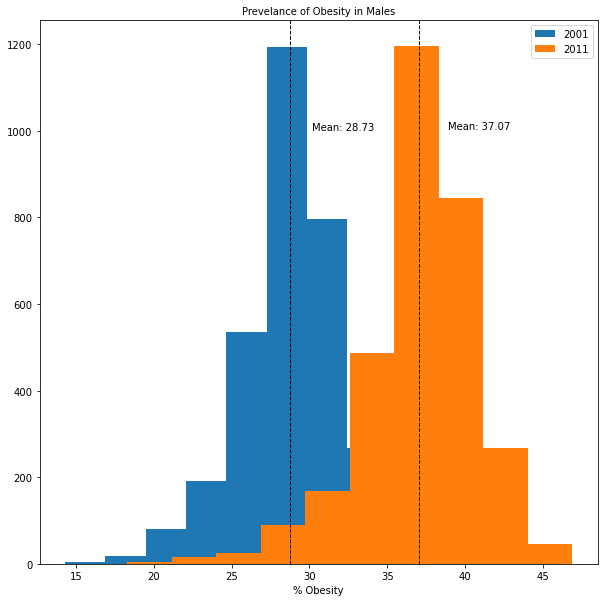

In [31]:
plt.rcParams['figure.figsize'] = (10,10) 
fig, axes = plt.subplots(nrows= 1, ncols = 1)
axes.hist(o_pa_le_nos['Male obesity prevalence, 2001 (%)'], label = '2001')
axes.axvline(o_pa_le_nos['Male obesity prevalence, 2001 (%)'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
axes.text(o_pa_le_nos['Male obesity prevalence, 2001 (%)'].mean()*1.05, max_ylim* .80,
               'Mean: {:.2f}'.format(o_pa_le_nos['Male obesity prevalence, 2001 (%)'].mean()))
axes.set_xlabel('% Obesity', size = 10)
#axes[0,0].ylabel('2008', size = 15)


axes.hist(o_pa_le_nos['Male obesity  prevalence, 2011* (%)'], label = '2011')
axes.axvline(o_pa_le_nos['Male obesity  prevalence, 2011* (%)'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
axes.text(o_pa_le_nos['Male obesity  prevalence, 2011* (%)'].mean()*1.05, max_ylim* .80,
               'Mean: {:.2f}'.format(o_pa_le_nos['Male obesity  prevalence, 2011* (%)'].mean()))
axes.set_xlabel('% Obesity', size = 10)
#axes[0,0].ylabel('2008', size = 15)
axes.set_title('Prevelance of Obesity in Males', size = 10)

plt.legend()
plt.show()

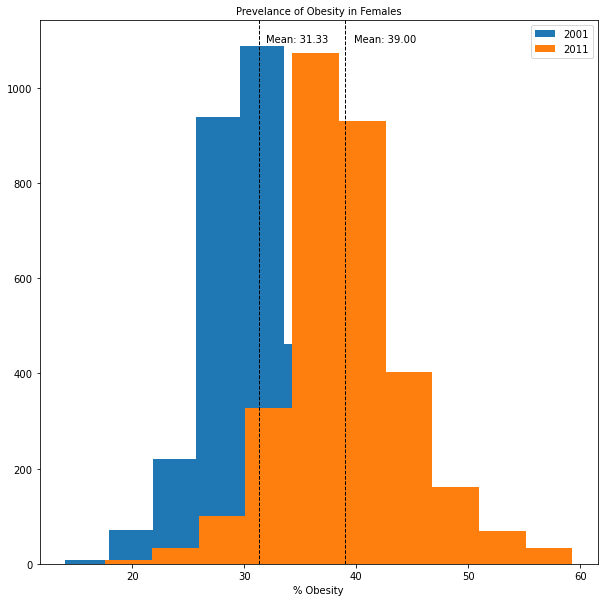

In [32]:
plt.rcParams['figure.figsize'] = (10,10) 
fig, axes = plt.subplots(nrows= 1, ncols = 1)

axes.hist(o_pa_le_nos['Female obesity prevalence, 2001 (%)'], label = '2001')
axes.axvline(o_pa_le_nos['Female obesity prevalence, 2001 (%)'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
axes.text(o_pa_le_nos['Female obesity prevalence, 2001 (%)'].mean()*1.02, max_ylim* .96,
               'Mean: {:.2f}'.format(o_pa_le_nos['Female obesity prevalence, 2001 (%)'].mean()))
axes.set_xlabel('% Obesity', size = 10)
#axes[0,1].ylabel('2008', size = 15)

axes.hist(o_pa_le_nos['Female obesity prevalence, 2011* (%)'], label = '2011')
axes.axvline(o_pa_le_nos['Female obesity prevalence, 2011* (%)'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
axes.text(o_pa_le_nos['Female obesity prevalence, 2011* (%)'].mean()*1.02, max_ylim* .96,
               'Mean: {:.2f}'.format(o_pa_le_nos['Female obesity prevalence, 2011* (%)'].mean()))
axes.set_xlabel('% Obesity', size = 10)
#axes[0,0].ylabel('2008', size = 15)
axes.set_title('Prevelance of Obesity in Females', size = 10)

plt.legend()
plt.show()

In [33]:
o_pa_le_nos.describe()

Male obesity prevalence, 2001 (%)  Female obesity prevalence, 2001 (%)  \
count                        3142.000000                          3142.000000   
mean                           28.732591                            31.329694   
std                             3.143502                             5.088926   
min                            14.300000                            14.000000   
25%                            27.200000                            28.400000   
50%                            28.900000                            30.600000   
75%                            30.700000                            33.700000   
max                            40.200000                            53.100000   

       Male obesity prevalence, 2009 (%)  \
count                        3142.000000   
mean                           35.903151   
std                             3.516675   
min                            17.800000   
25%                            34.300000   
50%                            36.200000   
75%                            38.100000   
max                            45.600000   

       Female obesity  prevalence, 2009 (%)  \
count                           3142.000000   
mean                              38.084405   
std                                5.521528   
min                               17.200000   
25%                               34.800000   
50%                               37.600000   
75%                               41.000000   
max                               59.300000   

       Male obesity  prevalence, 2011* (%)  \
count                          3142.000000   
mean                             37.072947   
std                               3.600805   
min                              18.300000   
25%                              35.400000   
50%                              37.400000   
75%                              39.300000   
max                              46.900000   

       Female obesity prevalence, 2011* (%)  \
count                           3142.000000   
mean                              39.001941   
std                                5.562051   
min                               17.600000   
25%                               35.600000   
50%                               38.600000   
75%                               42.000000   
max                               59.300000   

       Difference in male obesity prevalence, 2001-2009 (percentage points)  \
count                                        3142.000000                      
mean                                            7.171356                      
std                                             2.008706                      
min                                            -2.900000                      
25%                                             5.900000                      
50%                                             7.200000                      
75%                                             8.475000                      
max                                            15.800000                      

       Difference in female obesity prevalence, 2001-2009 (percentage points)  \
count                                        3142.000000                        
mean                                            6.753851                        
std                                             2.130062                        
min                                            -1.400000                        
25%                                             5.300000                        
50%                                             6.700000                        
75%                                             8.100000                        
max                                            16.400000                        

       Male sufficient physical activity prevalence, 2001 (%)  \
count                                        3142.000000        
mean                                         

In [34]:
o_pa_le_st.describe()

Male obesity prevalence, 2001 (%)  Female obesity prevalence, 2001 (%)  \
count                          51.000000                            51.000000   
mean                           26.060784                            28.323529   
std                             2.567729                             3.220285   
min                            17.900000                            19.400000   
25%                            24.450000                            26.400000   
50%                            26.400000                            28.200000   
75%                            27.950000                            30.850000   
max                            30.300000                            36.400000   

       Male obesity prevalence, 2009 (%)  \
count                          51.000000   
mean                           32.962745   
std                             3.108116   
min                            21.600000   
25%                            31.700000   
50%                            32.900000   
75%                            35.150000   
max                            38.200000   

       Female obesity  prevalence, 2009 (%)  \
count                             51.000000   
mean                              35.009804   
std                                3.584146   
min                               25.400000   
25%                               32.450000   
50%                               34.900000   
75%                               37.850000   
max                               43.500000   

       Male obesity  prevalence, 2011* (%)  \
count                            51.000000   
mean                             34.023529   
std                               3.173994   
min                              22.400000   
25%                              32.700000   
50%                              33.900000   
75%                              36.300000   
max                              39.400000   

       Female obesity prevalence, 2011* (%)  \
count                             51.000000   
mean                              35.929412   
std                                3.635893   
min                               26.100000   
25%                               33.450000   
50%                               35.900000   
75%                               38.750000   
max                               44.500000   

       Difference in male obesity prevalence, 2001-2009 (percentage points)  \
count                                          51.000000                      
mean                                            6.898039                      
std                                             0.957181                      
min                                             3.700000                      
25%                                             6.250000                      
50%                                             7.100000                      
75%                                             7.400000                      
max                                             8.900000                      

       Difference in female obesity prevalence, 2001-2009 (percentage points)  \
count                                          51.000000                        
mean                                            6.692157                        
std                                             0.927544                        
min                                             4.600000                        
25%                                             6.000000                        
50%                                             6.700000                        
75%                                             7.350000                        
max                                             8.600000                        

       Male sufficient physical activity prevalence, 2001 (%)  \
count                                          51.000000        
mean                                         

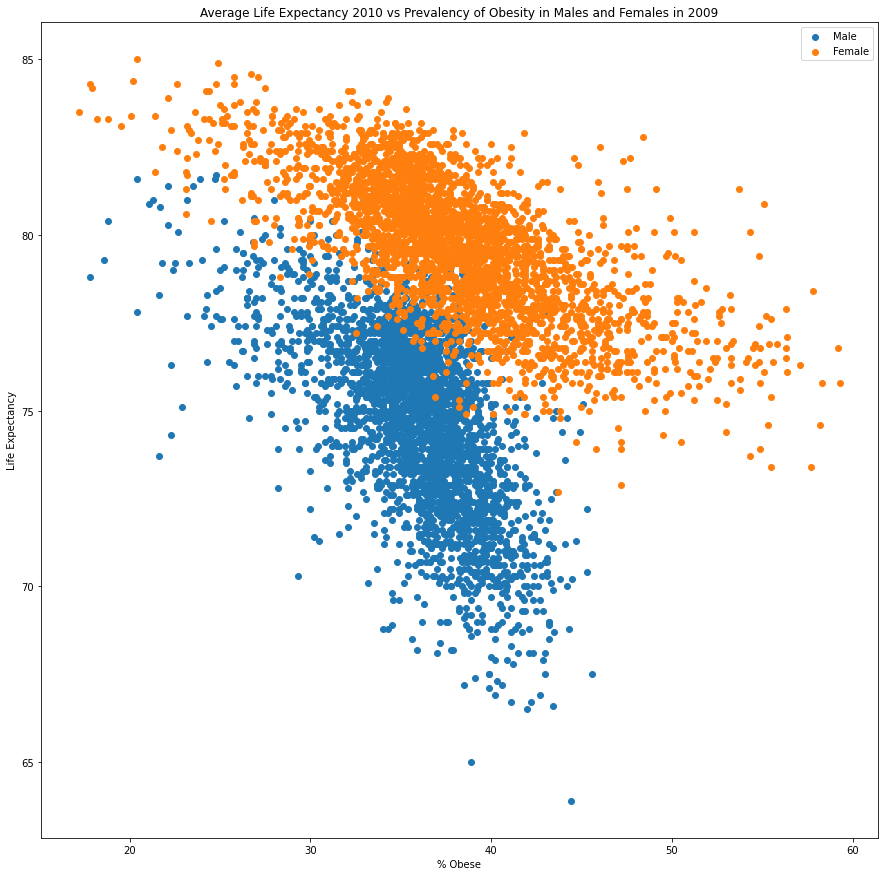

In [35]:
plt.rcParams['figure.figsize'] = (15,15) 
plt.scatter(o_pa_le_nos['Male obesity prevalence, 2009 (%)'], o_pa_le_nos['Male life expectancy, 2010 (years)'],
            label = 'Male')
plt.scatter(o_pa_le_nos['Female obesity  prevalence, 2009 (%)'], o_pa_le_nos['Female life expectancy, 2010 (years)'],
            label='Female')
plt.xlabel('% Obese')
plt.ylabel('Life Expectancy')
plt.title('Average Life Expectancy 2010 vs Prevalency of Obesity in Males and Females in 2009')
plt.legend()
plt.show()

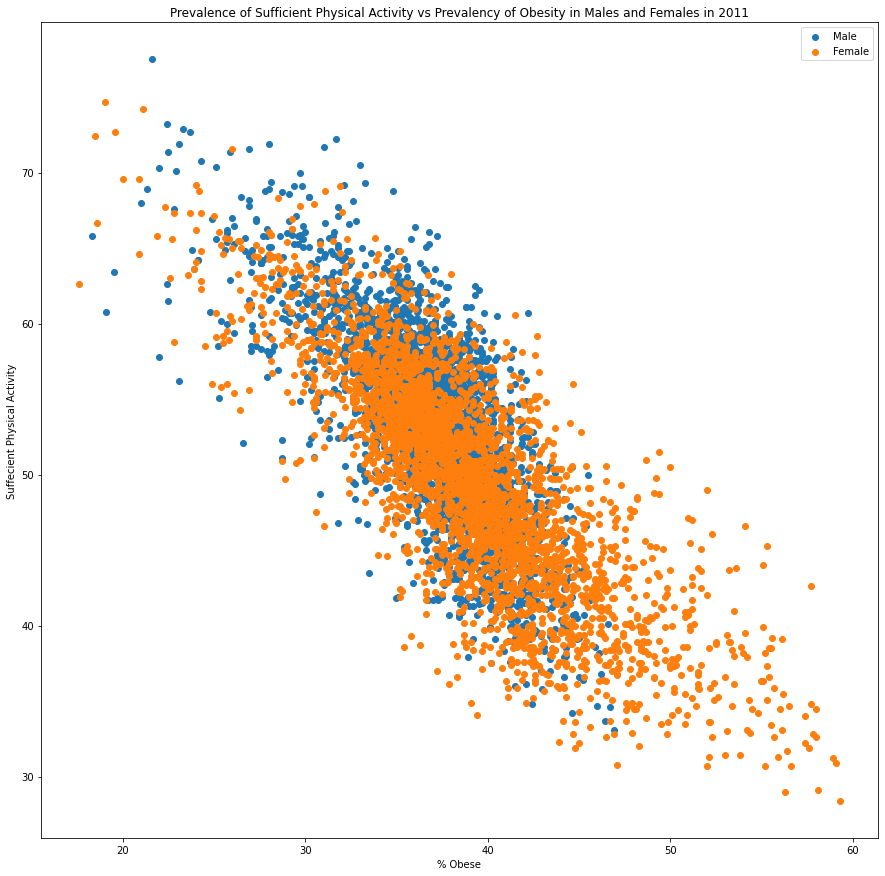

In [36]:
plt.rcParams['figure.figsize'] = (15,15) 
plt.scatter(o_pa_le_nos['Male obesity  prevalence, 2011* (%)'], o_pa_le_nos['Male sufficient physical activity  prevalence, 2011* (%)'],
            label = 'Male')
plt.scatter(o_pa_le_nos['Female obesity prevalence, 2011* (%)'], o_pa_le_nos['Female sufficient physical activity  prevalence, 2011* (%)'],
            label='Female')
plt.xlabel('% Obese')
plt.ylabel('Suffecient Physical Activity')
plt.title('Prevalence of Sufficient Physical Activity vs Prevalency of Obesity in Males and Females in 2011')
plt.legend()
plt.show()

In [37]:
o_pa_le_st_us.head(1)

State  Male obesity prevalence, 2001 (%)  \
0  United States                               26.1   

   Female obesity prevalence, 2001 (%)  Male obesity prevalence, 2009 (%)  \
0                                 28.7                               32.8   

   Female obesity  prevalence, 2009 (%)  Male obesity  prevalence, 2011* (%)  \
0                                  35.1                                 33.8   

   Female obesity prevalence, 2011* (%)  \
0                                  36.1   

   Difference in male obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.7                      

   Difference in female obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.4                        

   Male sufficient physical activity prevalence, 2001 (%)  ...  \
0                                               56.8       ...   

   Male life expectancy, 1995 (years)  Female life expectancy, 1995 (years)  \
0                                72.5                                  78.8   

   Male life expectancy, 2000 (years)  Female life expectancy, 2000 (years)  \
0                                74.1                                  79.2   

   Male life expectancy, 2005 (years)  Female life expectancy, 2005 (years)  \
0                                74.9                                  79.9   

   Male life expectancy, 2010 (years)  Female life expectancy, 2010 (years)  \
0                                76.1                                  80.8   

   Difference in male life expectancy, 1985-2010 (years)  \
0                                                5.2       

   Difference in female life expectancy, 1985-2010 (years)  
0                                                3.0        

[1 rows x 31 columns]

In [55]:

USstats = [['Gender', 'Obesity 2001', 'Obesity 2009', 'Obesity 2011','Physical Activity 2011', 'Life Expectancy 2010'],
                  ['Male', '26.1%', '32.8%', '  33.8%', '56.3%', '76.1 years'],
                  ['Female', '28.7%', '35.1%', '  36.1%', '52.6%', '80.8 years']]
print(tabulate(USstats, headers='firstrow', tablefmt='fancy_grid'))
with open('USstats.txt', 'w') as f:
    f.write(tabulate(USstats))

╒══════════╤════════════════╤════════════════╤════════════════╤══════════════════════════╤════════════════════════╕
│ Gender   │ Obesity 2001   │ Obesity 2009   │ Obesity 2011   │ Physical Activity 2011   │ Life Expectancy 2010   │
╞══════════╪════════════════╪════════════════╪════════════════╪══════════════════════════╪════════════════════════╡
│ Male     │ 26.1%          │ 32.8%          │ 33.8%          │ 56.3%                    │ 76.1 years             │
├──────────┼────────────────┼────────────────┼────────────────┼──────────────────────────┼────────────────────────┤
│ Female   │ 28.7%          │ 35.1%          │ 36.1%          │ 52.6%                    │ 80.8 years             │
╘══════════╧════════════════╧════════════════╧════════════════╧══════════════════════════╧════════════════════════╛


In [44]:
corr_le_ob_M = o_pa_le_nos['Male obesity prevalence, 2009 (%)'].corr(o_pa_le_nos['Male life expectancy, 2010 (years)'])
print('The correlation between Obesity and Life Expectancy in Males is ', corr_le_ob_M)
corr_le_ob_F = o_pa_le_nos['Female obesity  prevalence, 2009 (%)'].corr(o_pa_le_nos['Female life expectancy, 2010 (years)'])
print('The correlation between Obesity and Life Expectancy in Females is ', corr_le_ob_F)
corr_pa_ob_M = o_pa_le_nos['Male obesity  prevalence, 2011* (%)'].corr(o_pa_le_nos['Male sufficient physical activity  prevalence, 2009 (%)'])
print('The correlation between Obesity and Physical activity in Males is ', corr_pa_ob_M)
corr_pa_ob_F = o_pa_le_nos['Female obesity prevalence, 2011* (%)'].corr(o_pa_le_nos['Female sufficient physical activity  prevalence, 2011* (%)'])
print('The correlation between Obesity and Physical Activity in Females is ', corr_pa_ob_F)

The correlation between Obesity and Life Expectancy in Males is  -0.6217802272337051
The correlation between Obesity and Life Expectancy in Females is  -0.7085284506277991
The correlation between Obesity and Physical activity in Males is  -0.7419064031017768
The correlation between Obesity and Physical Activity in Females is  -0.8081649718313442


The RMSE for Males Life Expectancy is  2
The R2 value for Males Life expectancy is  0.3866106509787973


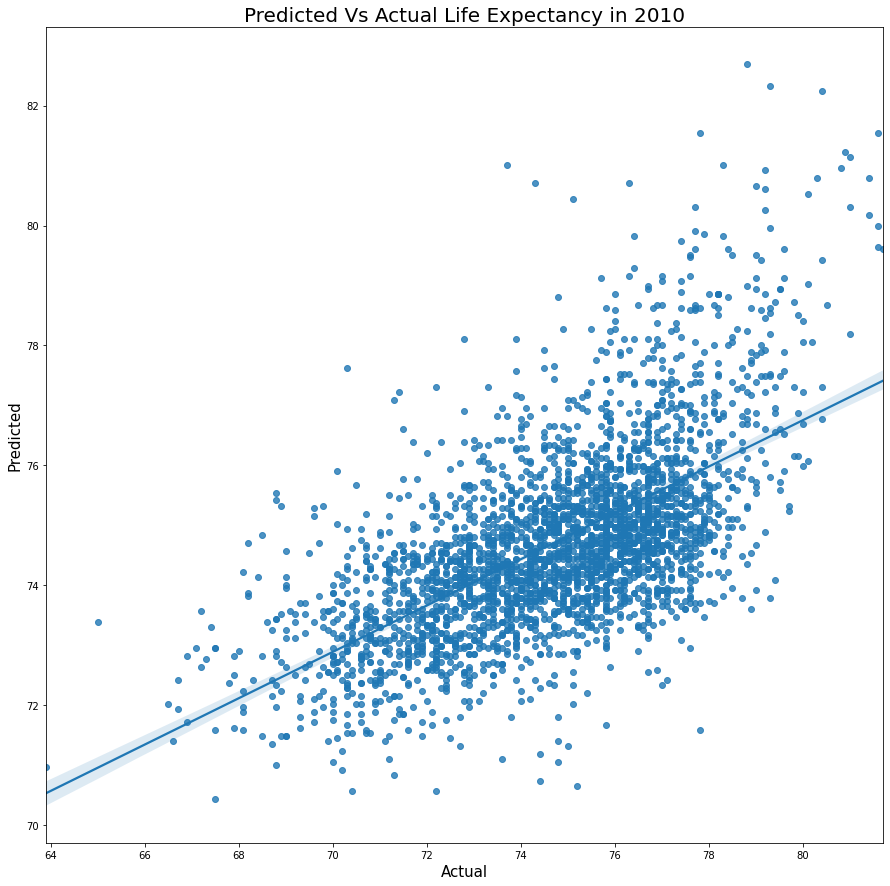

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

X = o_pa_le_nos['Male obesity prevalence, 2009 (%)'].values.reshape(-1,1)
Y = o_pa_le_nos['Male life expectancy, 2010 (years)'].values.reshape(-1,1)
linear2011_M = LinearRegression()
linear2011_M_mod = linear2011_M.fit(X,Y)
y_predict_2011_M = linear2011_M_mod.predict(X)
mse = mean_squared_error(Y, y_predict_2011_M)
rmse = round(np.sqrt(mse))
print('The RMSE for Males Life Expectancy is ', rmse)
r2_M1 = r2_score(Y, y_predict_2011_M)
print('The R2 value for Males Life expectancy is ', r2_M1)

plt.rcParams['figure.figsize'] = (15,15) 
sns.regplot(x=Y, y=y_predict_2011_M)
plt.xlabel('Actual', size = 15)
plt.ylabel('Predicted', size = 15)
plt.title('Predicted Vs Actual Life Expectancy in 2010', size = 20)
plt.show()

The RMSE for Female Life Expectancy is  1
The R2 value for Female Life expectancy is  0.502012565349029


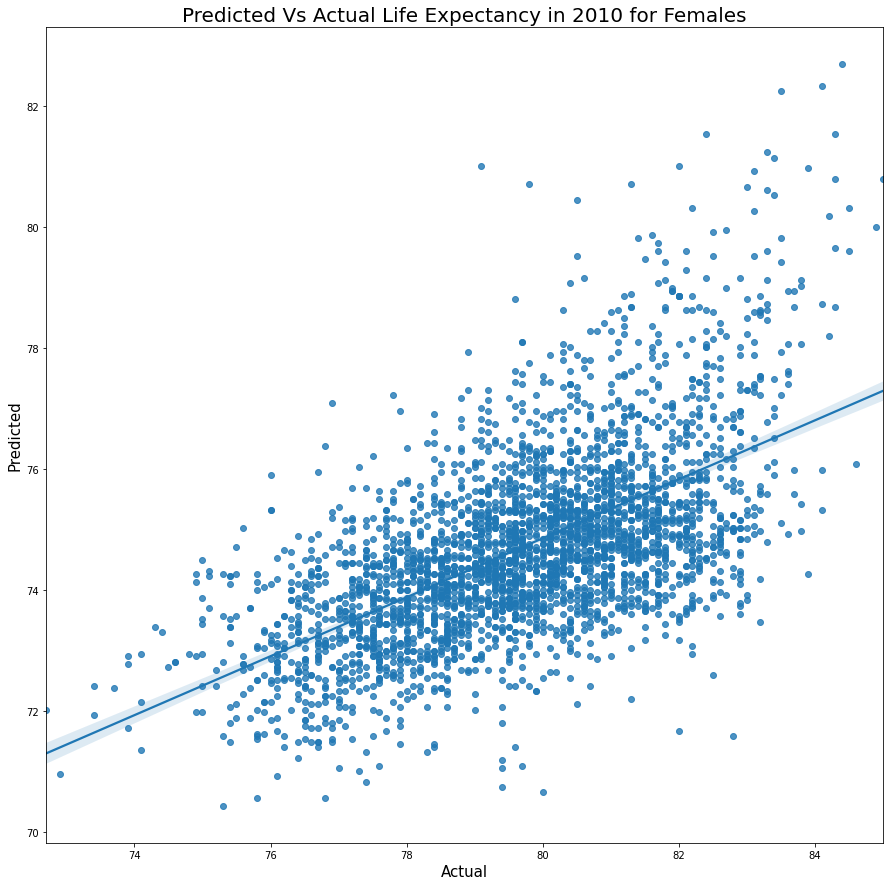

In [49]:
X = o_pa_le_nos['Female obesity  prevalence, 2009 (%)'].values.reshape(-1,1)
Y = o_pa_le_nos['Female life expectancy, 2010 (years)'].values.reshape(-1,1)
linear2011_F = LinearRegression()
linear2011_F_mod = linear2011_F.fit(X,Y)
y_predict_2011_F = linear2011_F_mod.predict(X)
mse = mean_squared_error(Y, y_predict_2011_F)
rmse = round(np.sqrt(mse))
print('The RMSE for Female Life Expectancy is ', rmse)
r2_F1 = r2_score(Y, y_predict_2011_F)
print('The R2 value for Female Life expectancy is ',r2_F1)

plt.rcParams['figure.figsize'] = (15,15) 
sns.regplot(x=Y, y=y_predict_2011_M)
plt.xlabel('Actual', size = 15)
plt.ylabel('Predicted', size = 15)
plt.title('Predicted Vs Actual Life Expectancy in 2010 for Females', size = 20)
plt.show()

The RMSE for Males Obesity Prevalence is  2
The R2 value for Males Obesity Prevalence is  0.5413688789154462


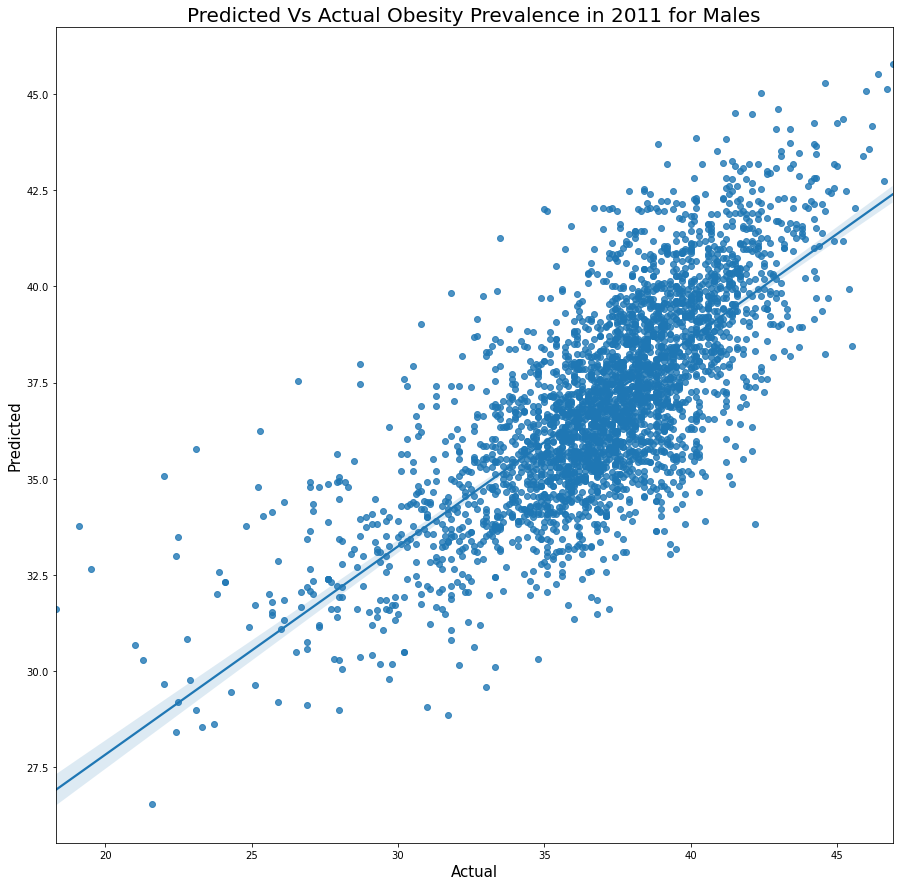

In [50]:
X = o_pa_le_nos['Male sufficient physical activity  prevalence, 2011* (%)'].values.reshape(-1,1)
Y = o_pa_le_nos['Male obesity  prevalence, 2011* (%)'].values.reshape(-1,1)
linear2011_M = LinearRegression()
linear2011_M_mod = linear2011_M.fit(X,Y)
y_predict_2011_M = linear2011_M_mod.predict(X)
mse = mean_squared_error(Y, y_predict_2011_M)
rmse = round(np.sqrt(mse))
print('The RMSE for Males Obesity Prevalence is ', rmse)
r2_M2 = r2_score(Y, y_predict_2011_M)
print('The R2 value for Males Obesity Prevalence is ', r2_M2)

plt.rcParams['figure.figsize'] = (15,15) 
sns.regplot(x=Y, y=y_predict_2011_M)
plt.xlabel('Actual', size = 15)
plt.ylabel('Predicted', size = 15)
plt.title('Predicted Vs Actual Obesity Prevalence in 2011 for Males', size = 20)
plt.show()

The RMSE for Female Obesity Prevalence is  3
The R2 value for Female Obesity Prevalence is  0.6531306216951565


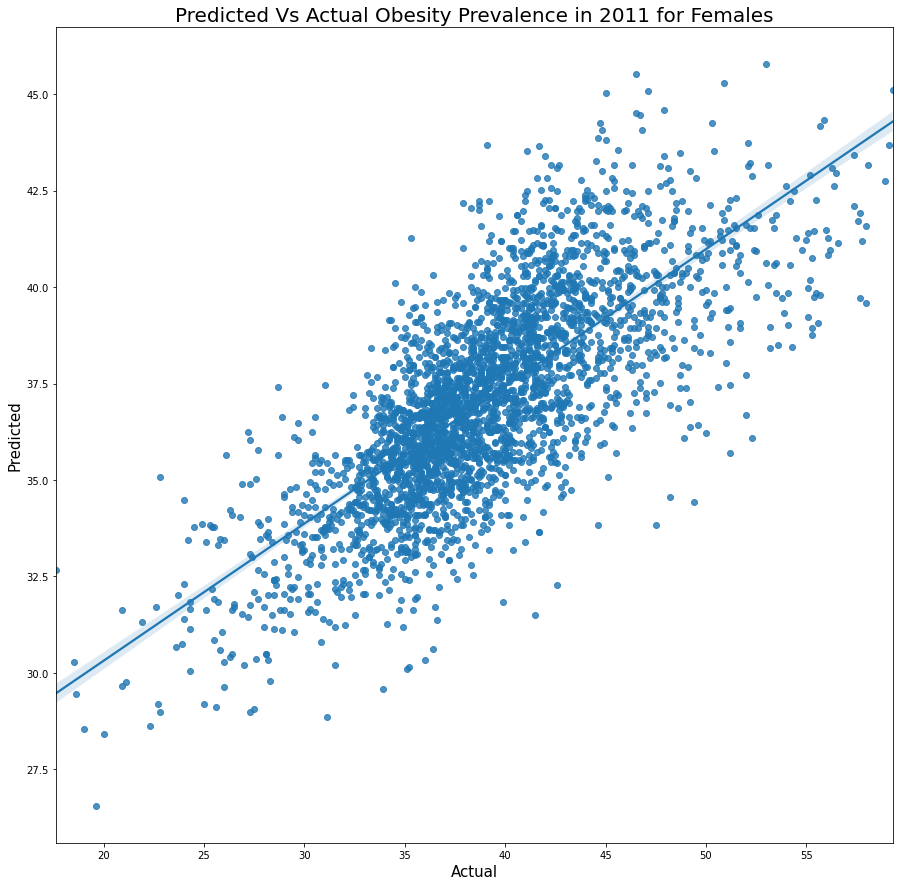

In [51]:
X = o_pa_le_nos['Female sufficient physical activity  prevalence, 2011* (%)'].values.reshape(-1,1)
Y = o_pa_le_nos['Female obesity prevalence, 2011* (%)'].values.reshape(-1,1)
linear2011_F = LinearRegression()
linear2011_F_mod = linear2011_F.fit(X,Y)
y_predict_2011_F = linear2011_F_mod.predict(X)
mse = mean_squared_error(Y, y_predict_2011_F)
rmse = round(np.sqrt(mse))
print('The RMSE for Female Obesity Prevalence is ', rmse)
r2_F3 = r2_score(Y, y_predict_2011_F)
print('The R2 value for Female Obesity Prevalence is ',r2_F3)

plt.rcParams['figure.figsize'] = (15,15) 
sns.regplot(x=Y, y=y_predict_2011_M)
plt.xlabel('Actual', size = 15)
plt.ylabel('Predicted', size = 15)
plt.title('Predicted Vs Actual Obesity Prevalence in 2011 for Females', size = 20)
plt.show()

In [57]:
Genderstats = [['Gender', 'Corr LE v O', 'R2 LE v O', 'Corr PA v O','R2 PA v O' ],
                  ['Male', round(corr_le_ob_M, 2), round(r2_M1, 2), round(corr_pa_ob_M, 2), round(r2_M2, 2)],
                  ['Female', round(corr_le_ob_F, 2), round(r2_F1, 2), round(corr_pa_ob_F, 2), round(r2_F3, 2)]]
print(tabulate(Genderstats, headers='firstrow', tablefmt='fancy_grid'))
with open('Genderstats.txt', 'w') as f:
    f.write(tabulate(Genderstats))

╒══════════╤═══════════════╤═════════════╤═══════════════╤═════════════╕
│ Gender   │   Corr LE v O │   R2 LE v O │   Corr PA v O │   R2 PA v O │
╞══════════╪═══════════════╪═════════════╪═══════════════╪═════════════╡
│ Male     │         -0.62 │        0.39 │         -0.74 │        0.54 │
├──────────┼───────────────┼─────────────┼───────────────┼─────────────┤
│ Female   │         -0.71 │        0.5  │         -0.81 │        0.65 │
╘══════════╧═══════════════╧═════════════╧═══════════════╧═════════════╛
